In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [130]:
dataset = pd.read_csv('../data/dataset_with_details.csv')
print(dataset.shape)
dataset.head()

(59963, 15)


,Unnamed: 0,ISBN,Book-Title,Book-Author,Publisher,Book-Rating,Location,Image-URL-L,User-ID,Country,New-Rating,Weighted-Rating,Rating-Count,Description,Tags
0,48,0440234743,The Testament,John Grisham,Dell,9,"sunnyvale, california, usa",http://images.amazon.com/images/P/0440234743.0...,7346,usa,6,4.678571,149,"In a plush Virginia office, a rich, angry old ...","Fiction, Women missionaries, Wills, People wit..."
1,49,0440234743,The Testament,John Grisham,Dell,8,"houston, texas, usa",http://images.amazon.com/images/P/0440234743.0...,7352,usa,5,4.678571,149,"In a plush Virginia office, a rich, angry old ...","Fiction, Women missionaries, Wills, People wit..."
2,51,0440234743,The Testament,John Grisham,Dell,6,"tumwater, washington, usa",http://images.amazon.com/images/P/0440234743.0...,11224,usa,3,4.678571,149,"In a plush Virginia office, a rich, angry old ...","Fiction, Women missionaries, Wills, People wit..."
3,55,0440234743,The Testament,John Grisham,Dell,8,"cordova, tennessee, usa",http://images.amazon.com/images/P/0440234743.0...,13552,usa,5,4.678571,149,"In a plush Virginia office, a rich, angry old ...","Fiction, Women missionaries, Wills, People wit..."
4,59,0440234743,The Testament,John Grisham,Dell,8,"chapel hill, north carolina, usa",http://images.amazon.com/images/P/0440234743.0...,23511,usa,5,4.678571,149,"In a plush Virginia office, a rich, angry old ...","Fiction, Women missionaries, Wills, People wit..."


In [131]:
dataset.columns

Index(['Unnamed: 0', 'ISBN', 'Book-Title', 'Book-Author', 'Publisher',
       'Book-Rating', 'Location', 'Image-URL-L', 'User-ID', 'Country',
       'New-Rating', 'Weighted-Rating', 'Rating-Count', 'Description', 'Tags'],
      dtype='object')

In [132]:
# Calcul du nombre de tokens par ISBN
# Copie de dataset
dataset_grouped_by_ISBN = dataset.copy()
l_columns = ['ISBN', 'Book-Title', 'Description', 'Tags']
dataset_grouped_by_ISBN = dataset_grouped_by_ISBN.loc[:, l_columns]

# Grouper par ISBN en conservant la première valeur pour chaque colonne
dataset_grouped_by_ISBN = dataset_grouped_by_ISBN.groupby('ISBN').agg({
    'Book-Title': 'first',
    'Description': 'first',
    'Tags': 'first'
}).reset_index()

# Calcul du nombre de mots par Description
dataset_grouped_by_ISBN['Description-Word-Count'] = dataset_grouped_by_ISBN['Description'].apply(lambda x: len(str(x).split()))
# Calcul du nombre de tokens par ISBN
dataset_grouped_by_ISBN['Tags-Token-Count'] = dataset_grouped_by_ISBN['Tags'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
display(dataset_grouped_by_ISBN.head())

,ISBN,Book-Title,Description,Tags,Description-Word-Count,Tags-Token-Count
0,0007154615,Unless : A Novel,"Reta Winters, 44-year-old successful author of...","literary fiction, goodness, Ethel Wilson Ficti...",51,25
1,0020198906,Joshua,No description found,"Joshua (Fictitious character), Fiction, Healer...",3,9
2,0020199600,GREAT GATSBY,"Here is a novel, glamorous, ironical, compassi...","Married people, fiction, American fiction (fic...",190,159
3,002026478X,AGE OF INNOCENCE,"Edith Wharton's most famous novel, written imm...","Fiction, Triangles (Interpersonal relations), ...",139,72
4,0020418809,CADDIE WOODLAWN,"""In 1864 Caddie Woodlawn was eleven, and as wi...","tomboys, Adolescence & Coming of Age, Adventur...",180,38


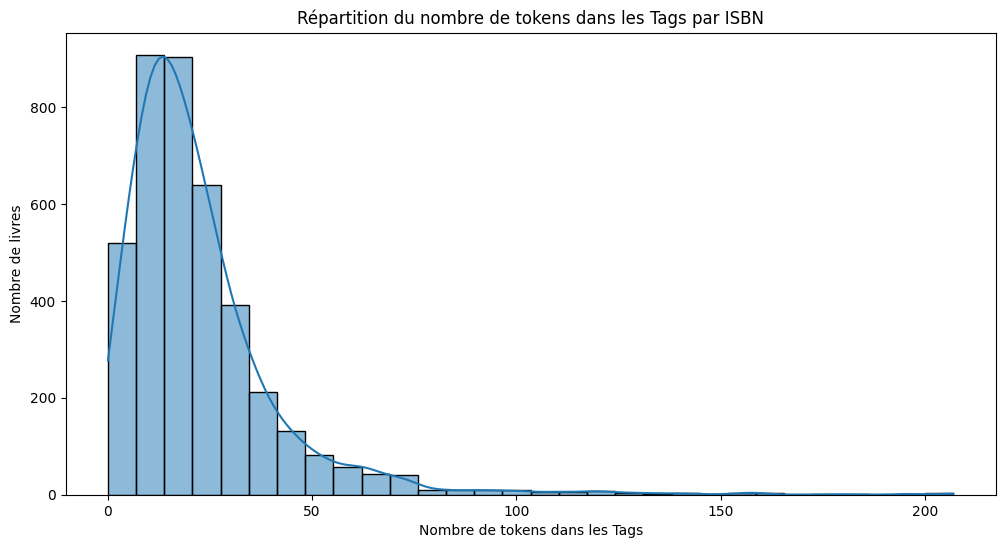

In [133]:
# Plot de la distribution des Tokens dans les Tags
plt.figure(figsize=(12, 6))
sns.histplot(dataset_grouped_by_ISBN['Tags-Token-Count'], bins=30, kde=True)
plt.title("Répartition du nombre de tokens dans les Tags par ISBN")
plt.xlabel("Nombre de tokens dans les Tags")
plt.ylabel("Nombre de livres")
plt.show()

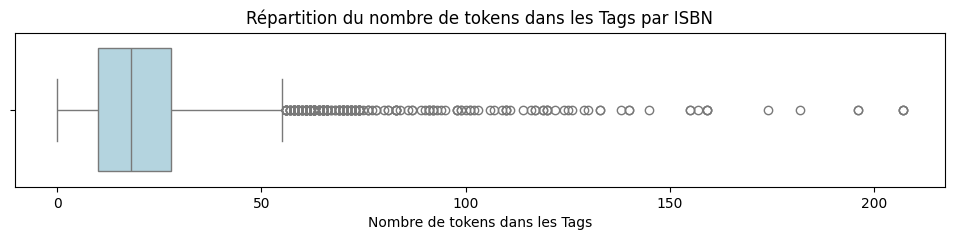

In [134]:
# Visualisation avec une box plot de la distribution des nombres de tokens dans les Tags
plt.figure(figsize=(12, 2))
sns.boxplot(x=dataset_grouped_by_ISBN['Tags-Token-Count'], color="lightblue")
plt.title("Répartition du nombre de tokens dans les Tags par ISBN")
plt.xlabel("Nombre de tokens dans les Tags")
plt.show()


In [135]:
# Affichage des livres ayant le plus grand nombre de Tokens dans les Tags : filtre > 55
mask = dataset_grouped_by_ISBN['Tags-Token-Count'] > 55
print('Nombre de livres de plus de 55 Tokens', len(dataset_grouped_by_ISBN.loc[mask]))
display(dataset_grouped_by_ISBN.loc[mask].sort_values(by='Tags-Token-Count', ascending=False))

Nombre de livres de plus de 55 Tokens 219


,ISBN,Book-Title,Description,Tags,Description-Word-Count,Tags-Token-Count
3097,067172262X,Hamlet,"In this quintessential Shakespeare tragedy, a ...","performing arts, nonfiction classics, Shakespe...",151,207
2556,0553212478,Frankenstein,"Frankenstein; or, The Modern Prometheus is an ...","Frankenstein (Fictitious character), Frankenst...",76,207
2314,0451521285,The Tragedy of Hamlet Prince of Denmark,Unique features of The Signet Classic Shakespe...,"performing arts, nonfiction classics, Shakespe...",126,207
2318,0451523733,Adventures of Huckleberry Finn,"He has no mother, his father is a brutal drunk...","adventure and adventurers, Adventure stories, ...",164,196
2547,0553210793,The Adventures of Huckleberry Finn,"Hilariously picaresque, epic in scope, alive w...","adventure and adventurers, Adventure stories, ...",92,196
...,...,...,...,...,...,...
269,0062502182,The Alchemist: A Fable About Following Your Dream,"Combining magic, mysticism, wisdom and wonder ...","Translations into Indonesian, Voyages and trav...",106,56
1881,0441627404,The Once and Future King,T. H. White's modern classic about King Arthur...,"Adaptations, Arthur,, Arthur, in fiction, Arth...",46,56
3250,0679735771,American Psycho,"Patrick Bateman is handsome, well educated, in...","Gothic & Horror, Literary Fiction, capitalism,...",49,56
3397,0689817851,Go Ask Alice,A teen plunges into a downward spiral of addic...,"homelessness, bad trips, psychiatric hospitals...",146,56


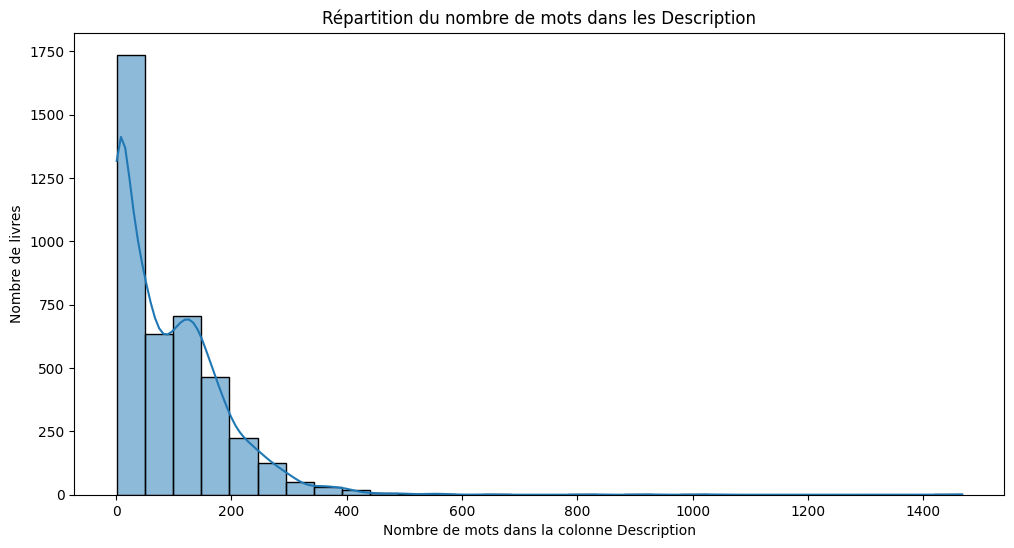

In [136]:
# Plot de la distribution des mots dans les Description
plt.figure(figsize=(12, 6))
sns.histplot(dataset_grouped_by_ISBN['Description-Word-Count'], bins=30, kde=True)
plt.title("Répartition du nombre de mots dans les Description")
plt.xlabel("Nombre de mots dans la colonne Description")
plt.ylabel("Nombre de livres")
plt.show()

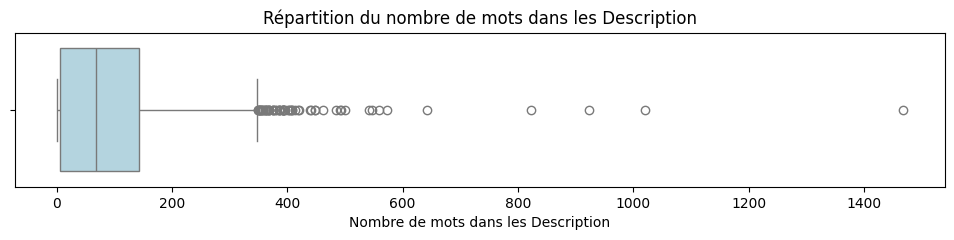

In [137]:
# Visualisation avec une box plot de la distribution des longueurs de Description en mots
plt.figure(figsize=(12, 2))
sns.boxplot(x=dataset_grouped_by_ISBN['Description-Word-Count'], color="lightblue")
plt.title("Répartition du nombre de mots dans les Description")
plt.xlabel("Nombre de mots dans les Description")
plt.show()

In [138]:
# Affichage des livres ayant le plus grand nombre de mots dans leur Description : filtre > 400
mask = dataset_grouped_by_ISBN['Description-Word-Count'] > 400
print('Nombre de livres de plus de 400 mots', len(dataset_grouped_by_ISBN.loc[mask]))
display(dataset_grouped_by_ISBN.loc[mask].sort_values(by='Description-Word-Count', ascending=False))

Nombre de livres de plus de 400 mots 27


,ISBN,Book-Title,Description,Tags,Description-Word-Count,Tags-Token-Count
3559,0786867906,Strip City: A Stripper's Farewell Journey Acro...,Written by Bernie Weisz e mail address:BernWei...,"Lily Burana, Stripteasers, Biography, New York...",1467,4
2910,0618131736,The Best American Short Stories 2002,Sue Miller Sue Miller -- Michael Chabon -- The...,"Canadian Short stories, American Short stories...",1021,6
501,0312282990,The Amazing Adventures of Kavalier &amp; Clay,The novel begins in 1939 with the arrival of 1...,"American Humorous stories, Arte de escribir, A...",924,57
1887,0441783589,Starship Troopers,Starship Troopers takes place in the midst of ...,"Fiction, Hugo Award Winner, Science fiction, S...",823,19
2708,055338015X,"Fifty Acres and a Poodle: A Story of Love, Liv...",Jeanne Marie Laskas had dreams of life on a fa...,"Biography, Social life and customs, Farm life,...",642,10
3137,0671749412,Going Home,Bestselling novelist Danielle Steel takes us o...,"German fiction, Fiction, Child abuse, Women au...",573,36
997,0375507493,What Should I Do with My Life?,What should I do with my life? It's a question...,"Self-actualization (Psychology), Actualización...",559,9
2840,0553582763,By the Light of the Moon,Dean Koontz has surpassed his longtime reputat...,"Patients, Brothers, Women comedians, Artists, ...",547,17
2058,0446670251,The Virgin Suicides,The Lisbons are a Catholic family living in Gr...,"Fiction, psychological, Young women, fiction, ...",542,37
2830,0553581929,Special Circumstances,Introducing an electrifying new voice in legal...,"Divorced people, Murder, Lawyers, Ex-police of...",501,11
